In [2]:
# Import all the necessay libraries and the API for information
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set(font_scale=1.5)
response = requests.get("https://api.teleport.org/api/continents/geonames%3ANA/urban_areas/?embed=United%20States")

In [3]:
data = response.json()
data.keys()
href_name = data['_links']['ua:items']
name = [x['name'] for x in href_name]
href = [i['href'] for i in href_name]

In [4]:
dfs = []

for x in href:
    url = x + 'scores/'
    resp = requests.get(url)
    columns = [x['name'] for x in resp.json()['categories']]
    data = [x['score_out_of_10'] for x in resp.json()['categories']]
    df = pd.DataFrame(data).T
    df.columns = columns
    dfs.append(df)

In [5]:
data = pd.concat(dfs)

In [6]:
data['City Name'] = name

In [7]:
data.set_index('City Name', inplace=True)

In [8]:
us_data = data.drop(['Belize City', 'Calgary', 'Guadalajara', 'Edmonton', 'Guatemala City',
 'Halifax', 'Havana', 'Managua', 'Mexico City', 'Montreal', 'Ottawa', 'Palo Alto', 'Panama', 'San Juan',
 'San Luis Obispo', 'San Salvador', 'Santo Domingo', 'Saskatoon', 'Toronto', 'Vancouver', 'Victoria', 'Winnipeg', 'Portland, ME', 'Kingston'])

In [9]:
grad_rates = {'Albuquerque':71, 'Anchorage':78, 'Asheville':87, 'Atlanta':89, 'Austin':90,
       'Baltimore':80, 'Birmingham':86, 'Boise':80, 'Boston':91, 'Boulder':94, 'Bozeman':85,
       'Buffalo':82, 'Charleston':84, 'Charlotte':81, 'Chattanooga':83.8, 'Chicago':78,
       'Cincinnati': 80, 'Cleveland':79, 'Colorado Springs':94, 'Columbus':82, 'Dallas':74,
       'Denver':77, 'Des Moines':84, 'Detroit':80, 'Eugene':78, 'Fort Collins':80, 'Honolulu':90,
       'Houston':77, 'Indianapolis':89, 'Jacksonville':87, 'Kansas City':89,
       'Knoxville':87, 'Las Vegas':85, 'Los Angeles':79, 'Louisville':93, 'Madison':95,
       'Memphis':84, 'Miami':85, 'Milwaukee':90, 'Minneapolis-Saint Paul':93, 'Nashville':89,
       'New Orleans':86, 'New York':85, 'Oklahoma City':88, 'Omaha':91, 'Orlando':89,
       'Philadelphia':89, 'Phoenix':86, 'Pittsburgh':93, 'Portland':91, 'Providence':86, 
       'Raleigh':91, 'Richmond':84, 'Rochester':90, 'Salt Lake City':90, 
       'San Antonio':84, 'San Diego':86, 'San Francisco Bay Area':88, 'San Jose':87,
       'Seattle':92, 'St. Louis':86.9, 'Tampa Bay Area':82, 'Washington, D.C.':90}

In [10]:
percent_ec = {'Albuquerque':58, 'Anchorage':61, 'Asheville':74, 'Atlanta':77, 'Austin':79,
       'Baltimore':73, 'Birmingham':74, 'Boise':73, 'Boston':75, 'Boulder':78, 'Bozeman':76,
       'Buffalo':82, 'Charleston':84, 'Charlotte':81, 'Chattanooga':83.8, 'Chicago':78,
       'Cincinnati': 69, 'Cleveland':68, 'Colorado Springs':70, 'Columbus':66, 'Dallas':64,
       'Denver':65, 'Des Moines':70, 'Detroit':69, 'Eugene':73, 'Fort Collins':71, 'Honolulu':82,
       'Houston':68, 'Indianapolis':79, 'Jacksonville':79, 'Kansas City':73,
       'Knoxville':80, 'Las Vegas':78, 'Los Angeles':74, 'Louisville':83, 'Madison':81,
       'Memphis':73, 'Miami':71, 'Milwaukee':74, 'Minneapolis-Saint Paul':78, 'Nashville':79,
       'New Orleans':75, 'New York':73, 'Oklahoma City':77, 'Omaha':80, 'Orlando':76,
       'Philadelphia':72, 'Phoenix':71, 'Pittsburgh':76, 'Portland':79, 'Providence':80, 
       'Raleigh':71, 'Richmond':72, 'Rochester':76, 'Salt Lake City':73, 
       'San Antonio':71, 'San Diego':73, 'San Francisco Bay Area':74, 'San Jose':70,
       'Seattle':83, 'St. Louis':70, 'Tampa Bay Area':69, 'Washington, D.C.':71}

In [11]:
us_data['Graduation Percentage'] = grad_rates.values()
us_data['Locations'] = grad_rates.keys()

In [12]:
us_data['Percentage in EC'] = percent_ec.values()

In [13]:
us_data['Culture Level'] = us_data['Leisure & Culture'].apply(lambda x: 'high' if x >= 7.6 else ('medium' if x>= 3.9 else 'low'))

In [14]:
us_data['Start Time'] = us_data['Culture Level'].apply(lambda x: 3 if x == 'high' else(2 if x == 'medium' else 1))

In [15]:
us_data['Graduation Percentage'].mean()

85.63015873015873

In [16]:
us_data.sort_values(by=['Graduation Percentage'], inplace=True, ascending=False)

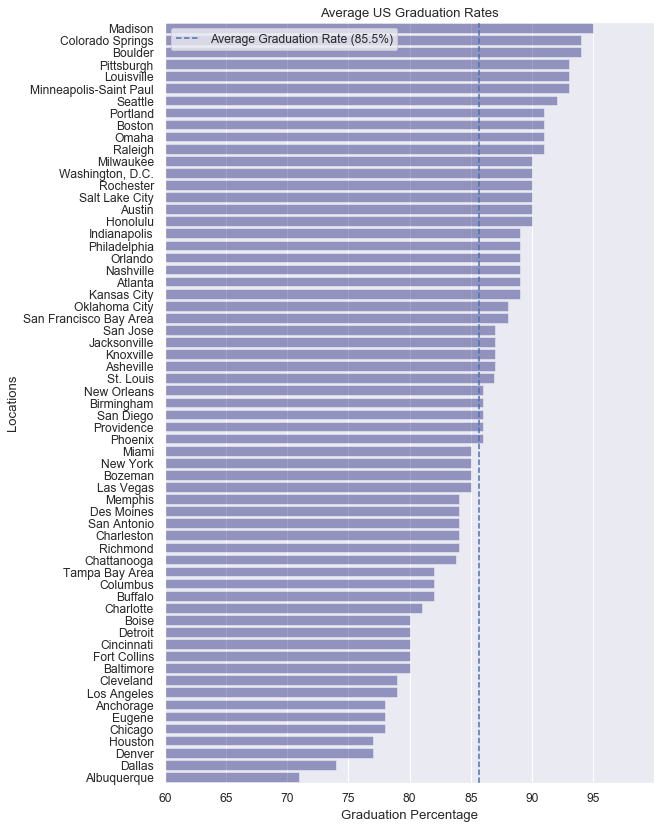

In [17]:
sns.set(font_scale=1.1)
sns.set_style("darkgrid")
plt.figure(figsize=(10,14))
sns.barplot(us_data['Graduation Percentage'], us_data['Locations'], alpha=.4, color='navy')
plt.axvline(us_data['Graduation Percentage'].mean(), linestyle='--', label='Average Graduation Rate (85.5%)')
plt.title('Average US Graduation Rates')
plt.xlim(60, 100)
plt.tick_params(axis='y', pad=5)
plt.xticks(np.arange(60, 100, 5))
plt.legend(loc='upper left')
plt.gcf().subplots_adjust(left=0.22)
plt.savefig('usAveGraduationRates.png')

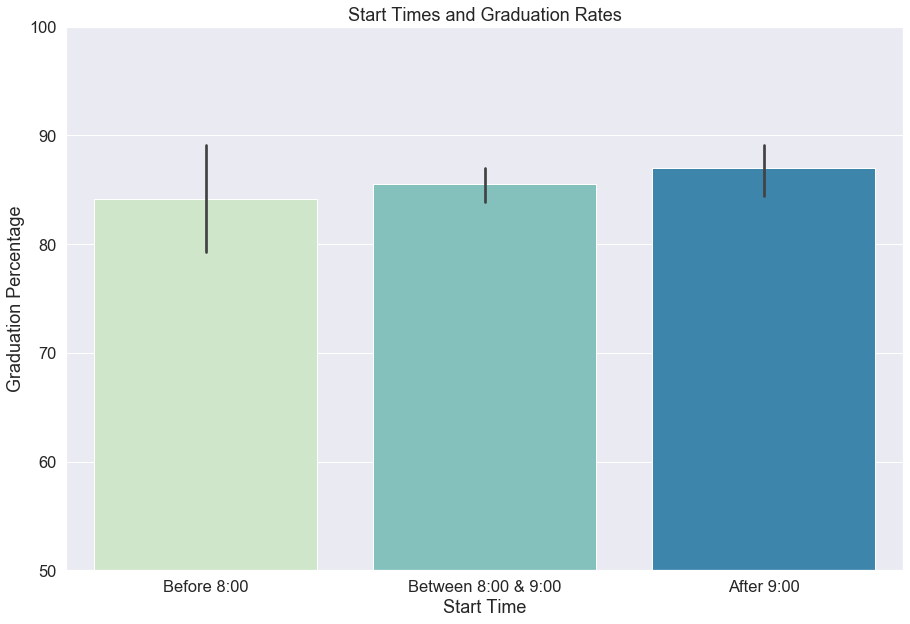

In [18]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.barplot(us_data['Start Time'], us_data['Graduation Percentage'], palette='GnBu')
plt.ylim(50, 100)
plt.title('Start Times and Graduation Rates')
plt.xticks(np.arange(3), ('Before 8:00', 'Between 8:00 & 9:00', 'After 9:00'))
plt.savefig('startTimes.png');

In [19]:
scipy.stats.ttest_ind((us_data[us_data['Start Time'] == 3]['Graduation Percentage']), 
                      (us_data[us_data['Start Time'] == 1]['Graduation Percentage']))

Ttest_indResult(statistic=1.0800786617162903, pvalue=0.29519282408438907)

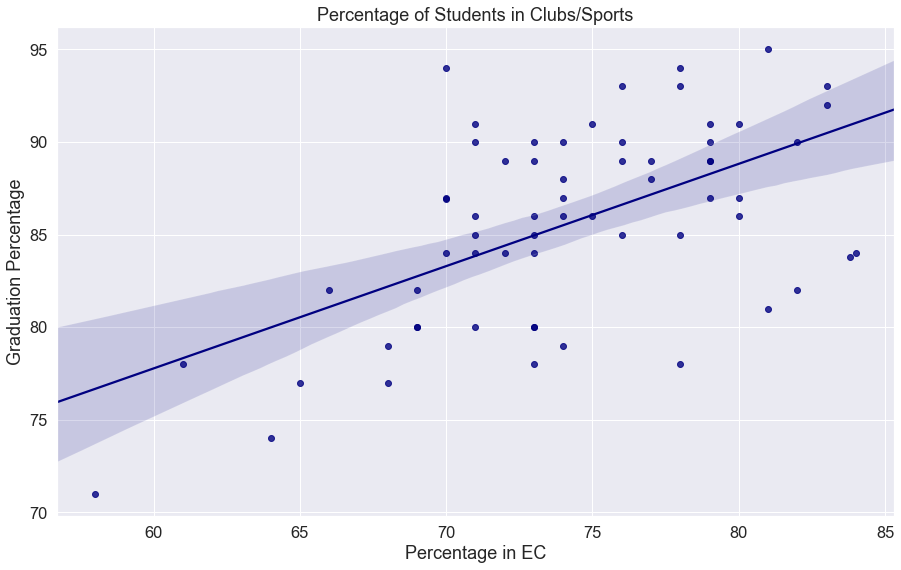

In [20]:
plt.figure(figsize=(15, 9))
sns.set(font_scale=1.5)
sns.regplot(us_data['Percentage in EC'], us_data['Graduation Percentage'], color='navy')
plt.title('Percentage of Students in Clubs/Sports')
plt.savefig('percentageInExtraCir.png')

In [21]:
us_data['Percentage in EC'].describe()

count    63.000000
mean     74.219048
std       5.484608
min      58.000000
25%      71.000000
50%      74.000000
75%      78.500000
max      84.000000
Name: Percentage in EC, dtype: float64

In [22]:
us_data['EC Level'] = us_data['Percentage in EC'].apply(lambda x: 'high' if x >= 78 else ('medium' if x>= 71 else 'low'))

In [23]:
scipy.stats.ttest_ind((us_data[us_data['EC Level'] == 'low']['Graduation Percentage']), 
                      (us_data[us_data['EC Level'] == 'high']['Graduation Percentage']))

Ttest_indResult(statistic=-3.9821793769537557, pvalue=0.0003682081417830794)

In [24]:
us_data_mod = us_data[['Tolerance', 'Graduation Percentage']]
us_data_mod['Tol_Level'] = us_data_mod['Tolerance'].apply(lambda x: 'high' if x >= 7.29 else ('medium' if x >= 5.8 else 'low'))

/Users/logananderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
scipy.stats.ttest_ind((us_data_mod[us_data_mod['Tol_Level'] == 'high']['Graduation Percentage']), (us_data_mod[us_data_mod['Tol_Level'] == 'low']['Graduation Percentage']))

Ttest_indResult(statistic=2.1040918135176074, pvalue=0.04170332061980797)

In [26]:
df = pd.read_excel('2016-2017Student.xlsx', header = [1,2,3], skiprows = 1)

orientation_bullying = df.iloc[:,[1,278,280,282,284,286]]
complete_homework = df.iloc[:,[1,368,370,372,374,376]]
safety = df.iloc[:,[1,418,420,422,424,426]]
combined = pd.merge(orientation_bullying, complete_homework)
combined = pd.merge(combined, safety)
columns_safe = ['Feel safe: Most or all of the time', 'Feel safe: Occasionally', 'Feel safe: Rarely', 'Feel safe: Never', 'Feel safe: Don\'t know']
columns_treated_badly = ['Treated Badly: Most or all of the time', 'Treated Badly: Occasionally', 'Treated Badly: Rarely', 'Treated Badly: Never', 'Treated Badly: Does not apply']
columns_complete_schoolwork = ['Complete Schoolwork: strongly agree', 'Complete Schoolwork: agree', 'Complete Schoolwork: disagree', 'Complete Schoolwork: strongly disagree', 'Complete Schoolwork: don\'t know']
combined.columns = ['School Name'] + columns_treated_badly + columns_complete_schoolwork + columns_safe

In [27]:
final_df = pd.DataFrame()
final_df['School_Name'] = combined.iloc[:,0]
final_df['Treated_Badly'] = combined.iloc[:,1] + combined.iloc[:,2] + combined.iloc[:,3]
final_df['Not_Treated_Badly'] = combined.iloc[:,4] + combined.iloc[:,5]
final_df['Completes_Schoolwork'] = combined.iloc[:,6] + combined.iloc[:,7]
final_df['Does_Not_Complete_Schoolwork'] = combined.iloc[:,8] + combined.iloc[:,9] + combined.iloc[:,10]
final_df['Feels_Safe'] = combined.iloc[:,11]
final_df['Does_Not_Feel_Safe'] = combined.iloc[:,12] + combined.iloc[:,13]
final_df = final_df[final_df['Treated_Badly'] < .2]
final_df.set_index('School_Name', inplace = True)

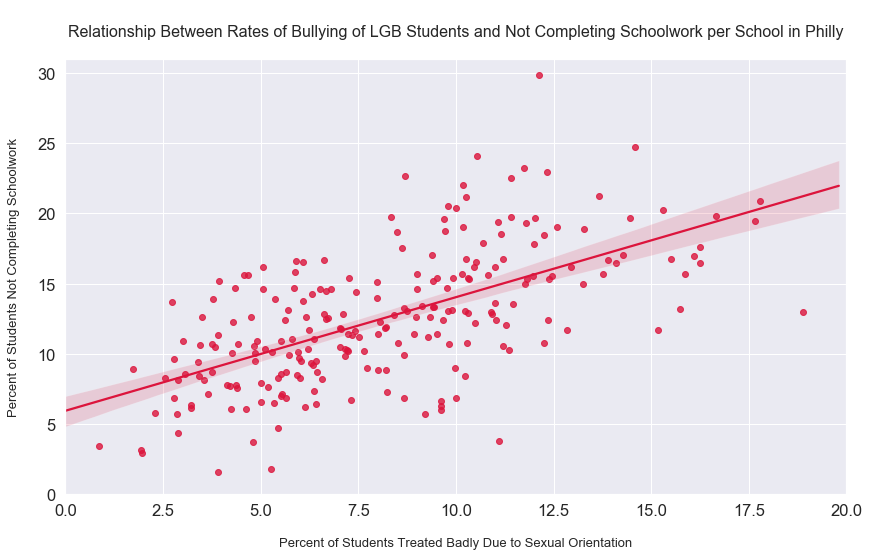

In [28]:
plt.figure(figsize = (14,8))
sns.regplot(x = final_df['Treated_Badly']*100, y = final_df['Does_Not_Complete_Schoolwork']*100, color = 'crimson')
plt.xlabel("\nPercent of Students Treated Badly Due to Sexual Orientation", fontsize = 13)
plt.ylabel("Percent of Students Not Completing Schoolwork\n", fontsize = 13)
plt.title('\nRelationship Between Rates of Bullying of LGB Students and Not Completing Schoolwork per School in Philly\n', fontsize = 16)
plt.xlim(0,.2*100)
plt.ylim(0,.31*100)
plt.savefig('NotDoingSchoolwork_LGB.png')
plt.show()

In [29]:
mod = ols('Does_Not_Complete_Schoolwork ~ Treated_Badly*Does_Not_Feel_Safe', data=final_df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                        sum_sq     df          F        PR(>F)
Treated_Badly                     1.280245e-01    1.0  96.053825  3.564921e-19
Does_Not_Feel_Safe                1.550047e-02    1.0  11.629638  7.665051e-04
Treated_Badly:Does_Not_Feel_Safe  5.375094e-07    1.0   0.000403  9.839955e-01
Residual                          3.065536e-01  230.0        NaN           NaN


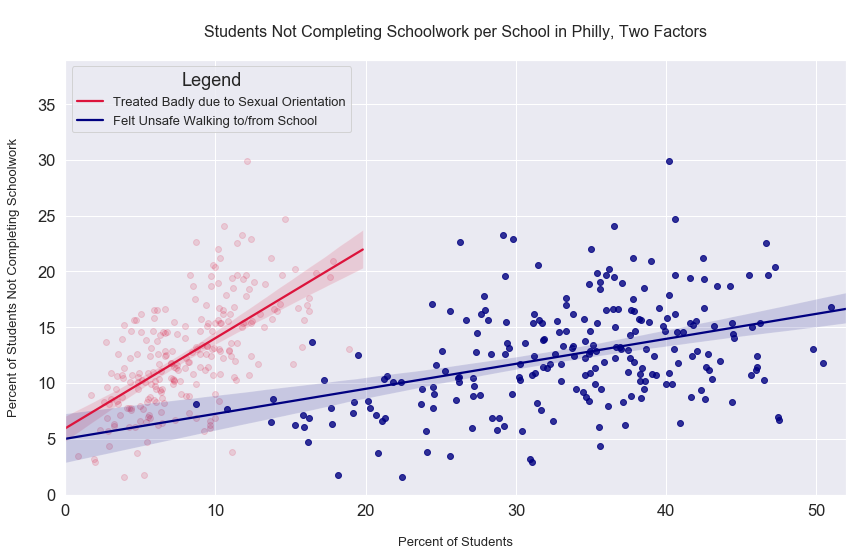

In [30]:
plt.figure(figsize = (14,8))
sns.regplot(x = final_df['Treated_Badly']*100, y = final_df['Does_Not_Complete_Schoolwork']*100, color = 'crimson', scatter_kws={'alpha':0.15})
sns.regplot(x = final_df['Does_Not_Feel_Safe']*100, y = final_df['Does_Not_Complete_Schoolwork']*100, color = 'navy')

plt.xlabel("\nPercent of Students", fontsize = 13)
plt.ylabel("Percent of Students Not Completing Schoolwork\n", fontsize = 13)
plt.title('\nStudents Not Completing Schoolwork per School in Philly, Two Factors\n', fontsize = 16)
plt.legend(title = 'Legend', loc = 'upper left', labels = ['Treated Badly due to Sexual Orientation', 'Felt Unsafe Walking to/from School'], fontsize = 13)
plt.xlim(0,.52*100)
plt.ylim(0,.39*100)
plt.savefig('NotDoingSchoolwork_LGB_Safe.png')
plt.show()